# Analysis of <font color=#b30000>Clostridium Difficile</font> 2010 to January 2016 #

### Import Libraries, Adjust Display Setting ###

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats, integrate
import pandas as pd
import seaborn as sns

In [3]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

### Import Data, Drop Duplicates ###

In [4]:
ACDF = pd.read_excel("Files/ACDF_RAW.xls")
CDIFZ = pd.read_excel("Files/CDIFZ_RAW.xls")
CDIFF = pd.read_excel("Files/CDIFF_RAW.xls")

CDIFF = CDIFF.drop_duplicates(subset="Order")
ACDF = ACDF.drop_duplicates(subset="Order")
CDIFZ = CDIFZ.drop_duplicates(subset="Order")

### Negative and Positive Results by Code (CDIFF, CDIFZ, ACDF) ###

In [5]:
CDIFF.CDIFF_Results.value_counts()

Negative    26831
Positive      390
Name: CDIFF_Results, dtype: int64

In [6]:
CDIFZ.CDIFZ_Results.value_counts()

Negative    7481
Positive      62
Name: CDIFZ_Results, dtype: int64

In [7]:
ACDF.ACDF_Results.value_counts()

Negative    18151
Positive      240
Name: ACDF_Results, dtype: int64

### Monthly Results by Code

In [8]:
#AVL Results
CDIFF.drop(["Ward Name", "CDIFF"], axis=1).groupby(["CDIFF_Results", "Date"])\
.count().reset_index().pivot(index="Date", columns="CDIFF_Results")\
.resample('M', how='sum').fillna(0)

Order         
CDIFF_Results Negative Positive
Date                           
2010-01-31         386        6
2010-02-28         472        2
2010-03-31         545        7
2010-04-30         559       10
2010-05-31         511        6
2010-06-30         529        7
2010-07-31         503        9
2010-08-31         511        2
2010-09-30         500        5
2010-10-31         507        9
2010-11-30         522        1
2010-12-31         467        4
2011-01-31         411        4
2011-02-28         469        1
2011-03-31         605       13
2011-04-30         591        9
2011-05-31         544        2
2011-06-30         597        8
2011-07-31         597        7
2011-08-31         617        3
2011-09-30         554        9
2011-10-31         470        7
2011-11-30         516        7
2011-12-31         424        7
2012-01-31         448        9
2012-02-29         483       13
2012-03-31         534       14
2012-04-30         425       10
2012-05-31         480        7
2012-06-30         451       20
2012-07-31         398       10
2012-08-31         469       13
2012-09-30         396       14
2012-10-31         457       12
2012-11-30         375        4
2012-12-31         306        0
2013-01-31         337        2
2013-02-28         344        6
2013-03-31         308        7
2013-04-30         362        5
2013-05-31         305        3
2013-06-30         307        5
2013-07-31         327        4
2013-08-31         362        4
2013-09-30         277        5
2013-10-31         382        5
2013-11-30         349        1
2013-12-31         270        0
2014-01-31         298        2
2014-02-28         290        1
2014-03-31         358        8
2014-04-30         398        5
2014-05-31         377        4
2014-06-30         316        5
2014-07-31         349        6
2014-08-31         339        3
2014-09-30         269        6
2014-10-31         240        4
2014-11-30         178        4
2014-12-31         162        1
2015-01-31         155        0
2015-02-28         139        2
2015-03-31         178        1
2015-04-30         149        5
2015-05-31         142        0
2015-06-30         149        4
2015-07-31         152        0
2015-08-31         125        2
2015-09-30          96        6
2015-10-31         106        0
2015-11-30          85        1
2015-12-31         109        2
2016-01-31         113        0

In [9]:
#ATL Results 1
CNP = CDIFZ.drop(["Ward Name", "CDIFZ"], axis=1).groupby(["CDIFZ_Results", "Date"])\
.count().reset_index().pivot(index="Date", columns="CDIFZ_Results")\
.resample('M', how='sum').fillna(0)
CNP

Order         
CDIFZ_Results Negative Positive
Date                           
2013-10-31           9        0
2013-11-30         237        0
2013-12-31         674        0
2014-01-31         778        4
2014-02-28         934        2
2014-03-31         872       14
2014-04-30         850       11
2014-05-31         858        6
2014-06-30         687        7
2014-07-31         809       14
2014-08-31         773        4

In [10]:
#ATL Results 2
ANP = ACDF.drop(["Ward Name", "ACDF"], axis=1).groupby(["Date","ACDF_Results"])\
.count().reset_index().pivot(index="Date", columns="ACDF_Results")\
.reset_index().set_index("Date").resample("M", how='sum').fillna(0)

ANP

Order         
ACDF_Results Negative Positive
Date                          
2014-09-30        826       10
2014-10-31       1058        7
2014-11-30        857        9
2014-12-31        922        7
2015-01-31       1012        8
2015-02-28       1014       16
2015-03-31       1138       13
2015-04-30       1191       20
2015-05-31       1155       15
2015-06-30       1174       19
2015-07-31       1253       17
2015-08-31       1067       18
2015-09-30       1115       24
2015-10-31       1179       30
2015-11-30       1028       14
2015-12-31       1106        6
2016-01-31       1056        7

### Combine Atlanta Data ### 

In [11]:
#Flatten Atlanta tables
CNP_POS = pd.DataFrame()
CNP_POS["Date"] = CNP.Order.reset_index()["Date"]
CNP_POS["Negative"] = CNP.Order.reset_index()["Negative"]
CNP_POS["Positive"] = CNP.Order.reset_index()["Positive"]

ANP_POS = pd.DataFrame()
ANP_POS["Date"] = ANP.Order.reset_index()["Date"]
ANP_POS["Negative"] = ANP.Order.reset_index()["Negative"]
ANP_POS["Positive"] = ANP.Order.reset_index()["Positive"]

#Concat 
ATL_CDIFF = pd.concat([CNP_POS, ANP_POS])
ATL_CDIFF = ATL_CDIFF.reset_index(drop=True)
ATL_CDIFF["Percent"] = ((ATL_CDIFF["Positive"]/(ATL_CDIFF['Negative'] + ATL_CDIFF["Positive"]))*100)
ATL_CDIFF["Total"] = ATL_CDIFF["Negative"]+ATL_CDIFF["Positive"]
ATL_CDIFF = ATL_CDIFF[["Date", "Positive", "Negative", "Total", "Percent"]]


### Plot Summary of Asheville Data with 95% Confidence Interval ### 

[None]

C:\Users\keenang\Desktop\Py\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


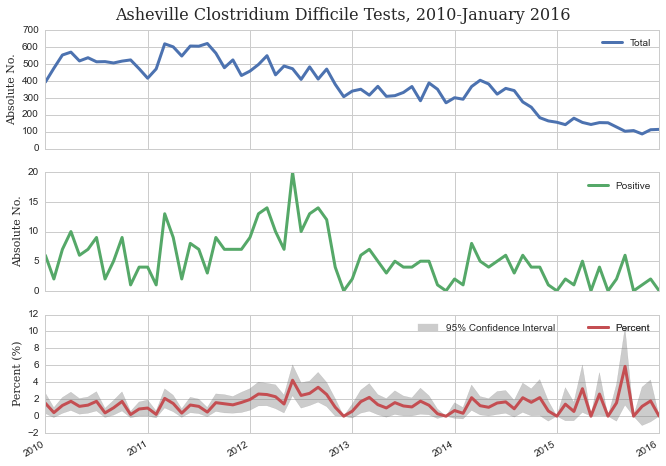

In [12]:
sns.set_style("whitegrid")
#palette = itertools.cycle(sns.color_palette())
TP = CDIFF.drop(["Ward Name", "CDIFF"], axis=1).groupby(["CDIFF_Results", "Date"]).count().reset_index().pivot(index="Date", columns="CDIFF_Results").resample('M', how='sum').Order["Positive"].fillna(0)
A = CDIFF.Date.value_counts().sort_index().resample("M", how="sum")
A = pd.DataFrame(A)
A = A.rename(columns={"Date": "Total"})
A["Positive"] = TP
A["Percent"] =( A["Positive"] / A["Total"])*100
ax = A.plot(subplots=True, lw=3, figsize=[11,8])
plt.suptitle("Asheville Clostridium Difficile Tests, 2010-January 2016", y=.94, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")
#ATL_CDIFF.set_index("Date")["Total"].plot(ax=ax[0], color=next(palette), lw=3, alpha=0.7)
#ATL_CDIFF.set_index("Date")["Positive"].plot(ax=ax[1], color=next(palette), lw=3, alpha=0.7)
#ATL_CDIFF.set_index("Date")["Percent"].plot(ax=ax[2], color=next(palette), lw=3, alpha=0.7)


#95% Confidence interval for a Proportion
def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record
ASH_CI = SEP(A["Positive"].values,A["Total"].values)

ASH_CI['lb']*100
ASH_CI['ub']*100
x=A.index

ax[2].fill_between(x,ASH_CI['lb']*100, ASH_CI['ub']*100, color="0.5", alpha=0.4)

grey_patch = mpatches.Patch(color='0.8', label='95% Confidence Interval')

ax[2].add_artist(ax[2].legend(handles=[grey_patch], loc=(0.6,0.81)))
handles, labels = ax[2].get_legend_handles_labels()
ax[2].add_artist(ax[2].legend(handles=handles, loc=1))
plt.setp(plt.gca().get_legend().get_texts(), alpha=0.80)
#ax[2].set_ylim([0,14])

#plt.savefig("AVL_CDIFF_SUM.png", dpi=300)

### Plot Summary of Atlanta Data with 95% Confidence Interval ### 

[None]

C:\Users\keenang\Desktop\Py\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


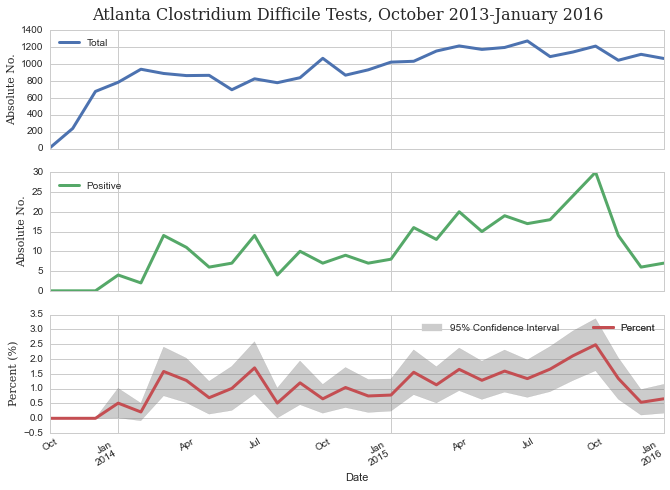

In [13]:
sns.set_style("whitegrid")
#palette = itertools.cycle(sns.color_palette())

ax = ATL_CDIFF[["Date", "Total", "Positive", "Percent"]].set_index("Date").plot(subplots=True, lw=3, figsize=[11,8])
plt.suptitle("Atlanta Clostridium Difficile Tests, October 2013-January 2016", y=.94, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")

#95% Confidence interval for a Proportion
def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record
ATL_CI = SEP(ATL_CDIFF["Positive"].values,ATL_CDIFF["Total"].values)

x=ATL_CDIFF.set_index("Date").index

ax[2].fill_between(x,ATL_CI['lb']*100, ATL_CI['ub']*100, color="0.5", alpha=0.4)

grey_patch = mpatches.Patch(color='0.8', label='95% Confidence Interval')

ax[2].add_artist(ax[2].legend(handles=[grey_patch], loc=(0.6,0.81)))
handles, labels = ax[2].get_legend_handles_labels()
ax[2].add_artist(ax[2].legend(handles=handles, loc=1))
plt.setp(plt.gca().get_legend().get_texts(), alpha=0.80)
#ax[2].set_ylim([0,12])
#plt.savefig("ATL_CDIFF_SUM.png", dpi=300)


### Merge All Data for Total Results ### 

In [14]:
#Merge AVL and ATL C. Diff Results
ALL_CDF = ACDF.rename(columns={"ACDF_Results":"Results"}).merge(CDIFZ.rename(columns={"CDIFZ_Results":"Results"}), how="outer", on=['Order', 'Results', 'Date', 'Ward Name'])\
.merge(CDIFF.rename(columns={"CDIFF_Results":"Results"}), how="outer", on=['Order', 'Results', 'Date', 'Ward Name'])
ALL_CDF = ALL_CDF[["Order", "Date", "Results", "CDIFF", "CDIFZ", "ACDF", "Ward Name"]]
ALL_CDF.describe()

,Order,Date,Results,CDIFF,CDIFZ,ACDF,Ward Name
count,53179,53179,53155,27221,7567,18391,46025
unique,53179,1815,2,1,1,1,3351
top,H4230051,2014-05-16 00:00:00,Negative,CDIFF,CDIFZ,ACDF,Referring Atlanta
freq,1,131,52463,27221,7567,18391,4106
first,NaN,2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN


In [15]:
ALL_CDF.Results.value_counts()

Negative    52463
Positive      692
Name: Results, dtype: int64

### Plot Summary of All Data ### 

[None]

C:\Users\keenang\Desktop\Py\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


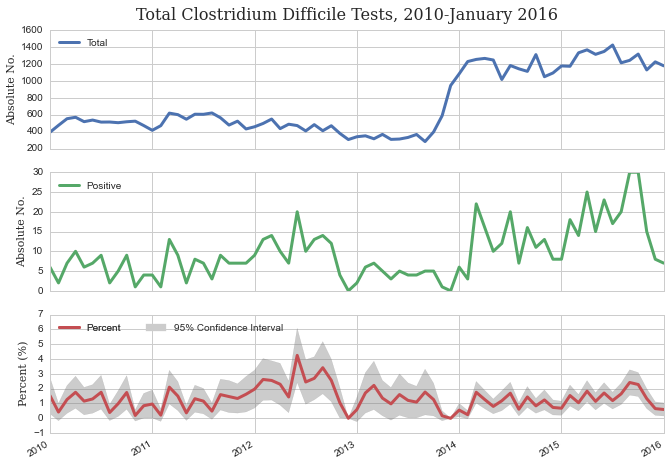

In [37]:
sns.set_style("whitegrid")
#palette = itertools.cycle(sns.color_palette())
Pos = ALL_CDF.drop(["Ward Name", "CDIFF", "ACDF", "CDIFZ"], axis=1).groupby(["Results", "Date"]).count().reset_index().pivot(index="Date", columns="Results").resample('M', how='sum').Order["Positive"].fillna(0)
Tot = ALL_CDF.Date.value_counts().sort_index().resample("M", how="sum")
A = pd.DataFrame(Tot)
A = A.rename(columns={"Date": "Total"})
A["Positive"] = Pos
A["Percent"] =( A["Positive"] / A["Total"])*100
ax = A[["Total", "Positive", "Percent"]].plot(subplots=True, lw=3, figsize=[11,8])
plt.suptitle("Total Clostridium Difficile Tests, 2010-January 2016", y=.94, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")

#Calculate 95% CI bands for proportions
def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record

ALL_CI = SEP(A["Positive"].values,A["Total"].values)

x=A.index
yl = ALL_CI['lb']*100
yu = ALL_CI['ub']*100

ax[2].fill_between(x, yl, yu, color="0.5", alpha=0.4)

grey_patch = mpatches.Patch(color='0.8', label='95% Confidence Interval')
ax[2].add_artist(ax[2].legend(handles=[grey_patch], loc=(0.15,0.81)))
handles, labels = ax[2].get_legend_handles_labels()
ax[2].add_artist(ax[2].legend(handles=handles, loc=2))
plt.setp(plt.gca().get_legend().get_texts(), alpha=0.80)
#ax[2].set_ylim([0,12])
#plt.savefig("All_CDF_SUM.png", dpi=300)



In [67]:
#Overall prevalence(%)
OP = 692/(692+52463)*100

#Plus or minus 95% CI
def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record
CI = SEP([692], [(692+52463)])
print("Overall prevalence: %.3f%% (95%% Confidence Interval %.3f%% - %.3f%%)" %(OP, CI["lb"]*100, CI["ub"]*100))

Overall prevalence: 1.302% (95% Confidence Interval 1.205% - 1.398%)


In [68]:
print("Average Number of Tests per Month: %.0f" %A["Total"].describe()[1])
print("Standard Deviation: %.1f" %A["Total"].describe()[2])
print("Minimum: %.0f" %A["Total"].describe()[3])
print("Maximum: %.0f" %A["Total"].describe()[7])

Average Number of Tests per Month: 728
Standard Deviation: 370.9
Minimum: 282
Maximum: 1422


In [69]:
print("Average Number of Tests per Month Since 2014: %.0f" %A[A.index > "2014"]["Total"].describe()[1])
print("Standard Deviation: %.1f" %A[A.index > "2014"]["Total"].describe()[2])
print("Minimum: %.0f" %A[A.index > "2014"]["Total"].describe()[3])
print("Maximum: %.0f" %A[A.index > "2014"]["Total"].describe()[7])

Average Number of Tests per Month Since 2014: 1215
Standard Deviation: 104.2
Minimum: 1015
Maximum: 1422
